In [1]:
!mkdir ~/.keras
!mkdir ~/.keras/models
!cp ../input/keras-pretrained-models/*notop* ~/.keras/models/
!cp ../input/keras-pretrained-models/imagenet_class_index.json ~/.keras/models/
!cp ../input/keras-pretrained-models/resnet50* ~/.keras/models/

The syntax of the command is incorrect.
The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob 
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from skimage.util.montage import montage2d
from skimage.io import imread
base_dir = os.path.join('D:/Neural Network/','input', 'pulmonary-chest-xray-abnormalities')

In [3]:
mont_paths = glob(os.path.join(base_dir, 'Montgomery', 'MontgomerySet', '*', '*.*'))
shen_paths = glob(os.path.join(base_dir, 'ChinaSet_AllFiles', 'ChinaSet_AllFiles', '*', '*.*'))
print('Montgomery Files', len(mont_paths))
print('Shenzhen Files', len(shen_paths))
all_paths_df = pd.DataFrame(dict(path = mont_paths + shen_paths))
all_paths_df['source'] = all_paths_df['path'].map(lambda x: x.split('/')[2])
all_paths_df['file_id'] = all_paths_df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
all_paths_df['patient_group']  = all_paths_df['file_id'].map(lambda x: x.split('_')[0])

all_paths_df['file_ext'] = all_paths_df['path'].map(lambda x: os.path.splitext(x)[1][1:])
all_paths_df = all_paths_df[all_paths_df.file_ext.isin(['png', 'txt'])]
all_paths_df['pulm_state']  = all_paths_df['file_id'].map(lambda x: int(x.split('_')[-1]))
all_paths_df.sample(5)

Montgomery Files 277
Shenzhen Files 1325


,path,source,file_id,patient_group,file_ext,pulm_state
1467,D:/Neural Network/input\pulmonary-chest-xray-a...,input\pulmonary-chest-xray-abnormalities\China...,CHNCXR_0529_1,CHNCXR,png,1
41,D:/Neural Network/input\pulmonary-chest-xray-a...,input\pulmonary-chest-xray-abnormalities\Montg...,MCUCXR_0056_0,MCUCXR,txt,0
895,D:/Neural Network/input\pulmonary-chest-xray-a...,input\pulmonary-chest-xray-abnormalities\China...,CHNCXR_0619_1,CHNCXR,txt,1
706,D:/Neural Network/input\pulmonary-chest-xray-a...,input\pulmonary-chest-xray-abnormalities\China...,CHNCXR_0430_1,CHNCXR,txt,1
455,D:/Neural Network/input\pulmonary-chest-xray-a...,input\pulmonary-chest-xray-abnormalities\China...,CHNCXR_0179_0,CHNCXR,txt,0


In [4]:
clean_patients_df = all_paths_df.pivot_table(index = ['patient_group', 'pulm_state', 'file_id'], 
                                             columns=['file_ext'], 
                                             values = 'path', aggfunc='first').reset_index()
clean_patients_df.sample(5)
from warnings import warn
def report_to_dict(in_path):
    with open(in_path, 'r') as f:
        all_lines = [x.strip() for x in f.read().split('\n')]
    info_dict = {}
    try:
        if "Patient's Sex" in all_lines[0]:
            info_dict['age'] = all_lines[1].split(':')[-1].strip().replace('Y', '')
            info_dict['sex'] = all_lines[0].split(':')[-1].strip()
            info_dict['report'] = ' '.join(all_lines[2:]).strip()
        else:
            info_dict['age'] = all_lines[0].split(' ')[-1].replace('yrs', '').replace('yr', '')
            info_dict['sex'] = all_lines[0].split(' ')[0].strip()
            info_dict['report'] = ' '.join(all_lines[1:]).strip()
        
        info_dict['sex'] = info_dict['sex'].upper().replace('FEMALE', 'F').replace('MALE', 'M').replace('FEMAL', 'F')[0:1]
        if 'month' in info_dict.get('age', ''):
            info_dict.pop('age') # invalid
        if 'day' in info_dict.get('age', ''):
            info_dict.pop('age') # invalid
        elif len(info_dict.get('age',''))>0:
            info_dict['age'] = float(info_dict['age'])
        else:
            info_dict.pop('age')
        return info_dict
    except Exception as e:
        print(all_lines)
        warn(str(e), RuntimeWarning)
        return {}
report_df = pd.DataFrame([dict(**report_to_dict(c_row.pop('txt')), **c_row) 
              for  _, c_row in clean_patients_df.iterrows()])
report_df.sample(5)

['male 16month', 'normal']
['male 16month', 'normal']
['female24yrs', 'normal']


C:\Users\mkahs\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: 'age'
C:\Users\mkahs\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: could not convert string to float: 'female24'


['male35yrs', 'PTB in the left upper field']
['male35yrs', 'Bilateral secondary PTB']
['Male , 38yrs,', 'secondary PTB in the bilateral upper and middle fields, mainly fibrous  lesions']


C:\Users\mkahs\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: could not convert string to float: 'male35'
C:\Users\mkahs\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: could not convert string to float: '38,'


,age,file_id,patient_group,png,pulm_state,report,sex
345,26.0,CHNCXR_0346_1,CHNCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,1,STB tuberculosis pleuritis,F
169,23.0,CHNCXR_0170_0,CHNCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,0,normal,M
520,34.0,CHNCXR_0521_1,CHNCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,1,PTB in the right upper field,M
654,33.0,CHNCXR_0655_1,CHNCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,1,"secondary PTB in the right upper field,mainly ...",M
496,45.0,CHNCXR_0497_1,CHNCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,1,bilateral PTB,M


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5BC663828>,
      dtype=object)

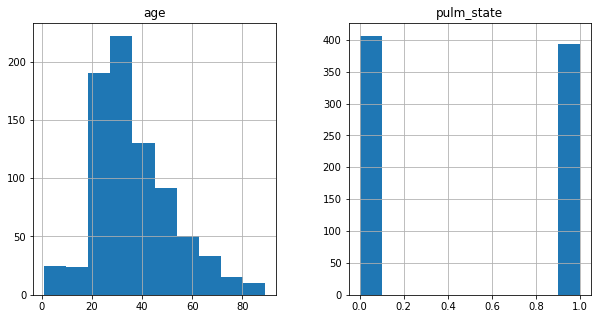

In [5]:
report_df[['age', 'patient_group', 'pulm_state', 'sex']].hist(figsize = (10, 5))

In [6]:
from sklearn.model_selection import train_test_split
raw_train_df, valid_df = train_test_split(report_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = report_df[['pulm_state', 'patient_group']])
print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
raw_train_df.sample(1)

train 600 validation 200


,age,file_id,patient_group,png,pulm_state,report,sex
628,62.0,CHNCXR_0629_1,CHNCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,1,Bilateral secondary PTB,M


New Data Size: 800 Old Size: 600


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5BD07B320>]],
      dtype=object)

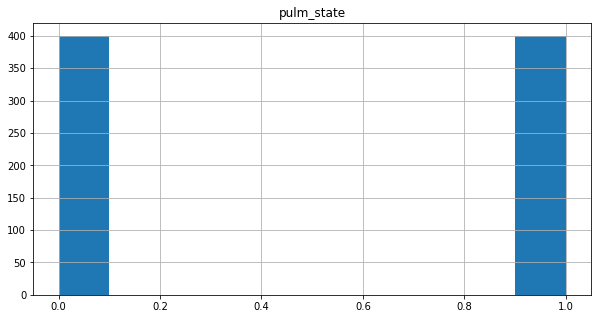

In [7]:
train_df = raw_train_df.groupby(['pulm_state', 'patient_group']).apply(lambda x: x.sample(200, replace = True)
                                                      ).reset_index(drop = True)
print('New Data Size:', train_df.shape[0], 'Old Size:', raw_train_df.shape[0])
train_df[['pulm_state', 'patient_group']].hist(figsize = (10, 5))

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from PIL import Image
ppi = lambda x: Image.fromarray(preprocess_input(np.array(x).astype(np.float32)))
IMG_SIZE = (224, 224) # slightly smaller than vgg16 normally expects
core_idg = ImageDataGenerator(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.15, 
                              width_shift_range = 0.15, 
                              rotation_range = 5, 
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range=0.2)
                    

C:\Users\mkahs\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [11]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'png',
                            y_col = 'pulm_state', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32)

valid_gen = flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'png',
                            y_col = 'pulm_state', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 256) # we can use much larger batches for evaluation
# used a fixed dataset for evaluating the algorithm
test_X, test_Y = next(flow_from_dataframe(core_idg, 
                               valid_df, 
                             path_col = 'png',
                            y_col = 'pulm_state', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1024)) # one big batch

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 800 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 200 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 200 images


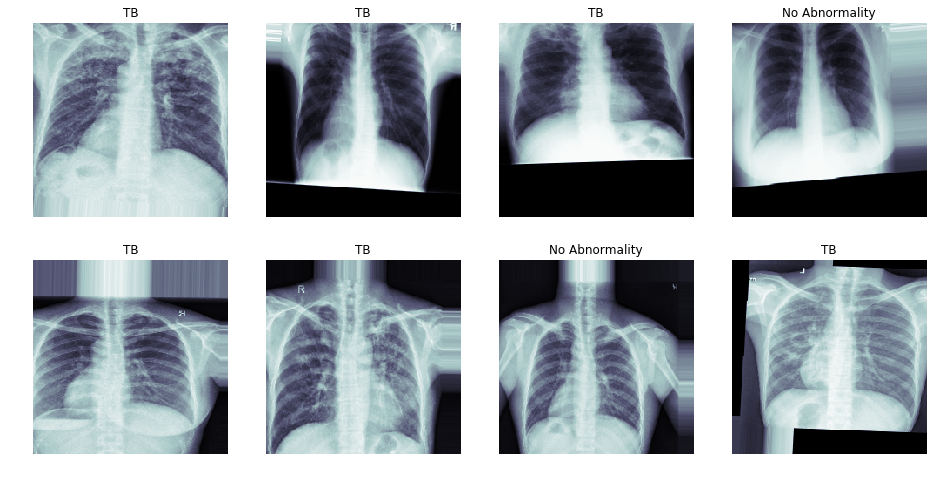

In [13]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = 0, vmax = 255)
    c_ax.set_title('%s' % ('TB' if c_y>0.5 else 'No Abnormality'))
    c_ax.axis('off')

In [33]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model
in_lay = Input(t_x.shape[1:])
base_pretrained_model = VGG16(input_shape =  t_x.shape[1:], 
                              include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

# here we do an attention mechanism to turn pixels in the GAP on an off

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(1, 
                                kernel_size = (1,1), 
                                padding = 'valid', 
                                activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.25)(Dense(128, activation = 'elu')(gap_dr))
out_layer = Dense(1, activation = 'sigmoid')(dr_steps)
tb_model = Model(inputs = [in_lay], outputs = [out_layer])

tb_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])

# tb_model.summary()
base_pretrained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
!rm -rf ~/.keras # clean up the model / make space for other things

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('tb_detector')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

C:\Users\mkahs\Anaconda3\lib\site-packages\keras\callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [17]:
tb_model.fit_generator(train_gen, 
                                  steps_per_epoch = 35,
                                  validation_data = (test_X, test_Y), 
                                  epochs = 8, 
                                  callbacks = callbacks_list)

Epoch 1/8
35/35 [==============================] - 659s 19s/step - loss: 0.6049 - binary_accuracy: 0.6571 - val_loss: 0.4442 - val_binary_accuracy: 0.8000

Epoch 00001: val_loss improved from inf to 0.44423, saving model to tb_detector_weights.best.hdf5
Epoch 2/8
35/35 [==============================] - 635s 18s/step - loss: 0.5101 - binary_accuracy: 0.7688 - val_loss: 0.4420 - val_binary_accuracy: 0.7800

Epoch 00002: val_loss improved from 0.44423 to 0.44196, saving model to tb_detector_weights.best.hdf5
Epoch 3/8
35/35 [==============================] - 633s 18s/step - loss: 0.4517 - binary_accuracy: 0.7991 - val_loss: 0.4272 - val_binary_accuracy: 0.7900

Epoch 00003: val_loss improved from 0.44196 to 0.42721, saving model to tb_detector_weights.best.hdf5
Epoch 4/8
35/35 [==============================] - 636s 18s/step - loss: 0.4316 - binary_accuracy: 0.8036 - val_loss: 0.4249 - val_binary_accuracy: 0.7950

Epoch 00004: val_loss improved from 0.42721 to 0.42488, saving model to tb

In [45]:
tb_model.load_weights(weight_path)
tb_model.save('full_tb_model.h5')

In [46]:
# get the attention layer since it is the only one with a single output dim
for attn_layer in tb_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

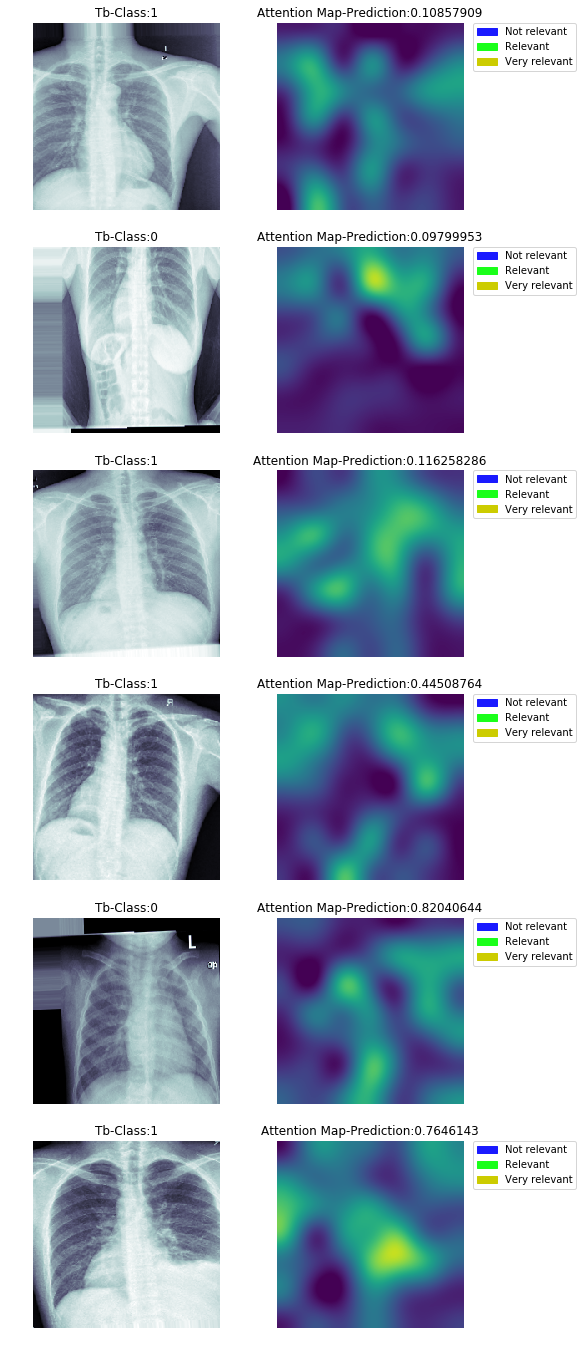

In [55]:
import keras.backend as K
import matplotlib.patches as mpatches
rand_idx = np.random.choice(range(len(test_X)), size = 6)
attn_func = K.function(inputs = [tb_model.get_input_at(0), K.learning_phase()],
           outputs = [attn_layer.get_output_at(0)]
          )
fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = test_X[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
    real_label = test_Y[c_idx]
    img_ax.set_title('Tb-Class:%s' % (real_label))
    pred_confidence = tb_model.predict(cur_img)[0]
    t=1
    cmap = {1:[0.1,0.1,1.0,t],2:[0.1,1.0,0.1,t],3:[0.8,0.8,0.0,t]}
    labels = {1:'Not relevant',2:'Relevant',3:'Very relevant'}
    attn_ax.set_title('Attention Map-Prediction:%s' % (pred_confidence[0]))
    patches =[mpatches.Patch(color=cmap[i],label=labels[i]) for i in cmap]
    attn_ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
fig.savefig('attention_map.png', dpi = 300)

In [21]:
pred_Y = tb_model.predict(test_X, batch_size = 16, verbose = True)

200/200 [==============================] - 90s 449ms/step


              precision    recall  f1-score   support

     Healthy       0.79      0.81      0.80       102
          TB       0.80      0.78      0.79        98

   micro avg       0.80      0.80      0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



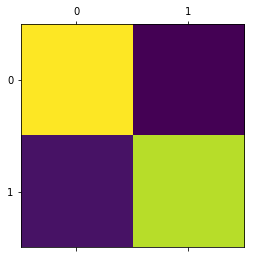

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
plt.matshow(confusion_matrix(test_Y, pred_Y>0.5))
print(classification_report(test_Y, pred_Y>0.5, target_names = ['Healthy', 'TB']))

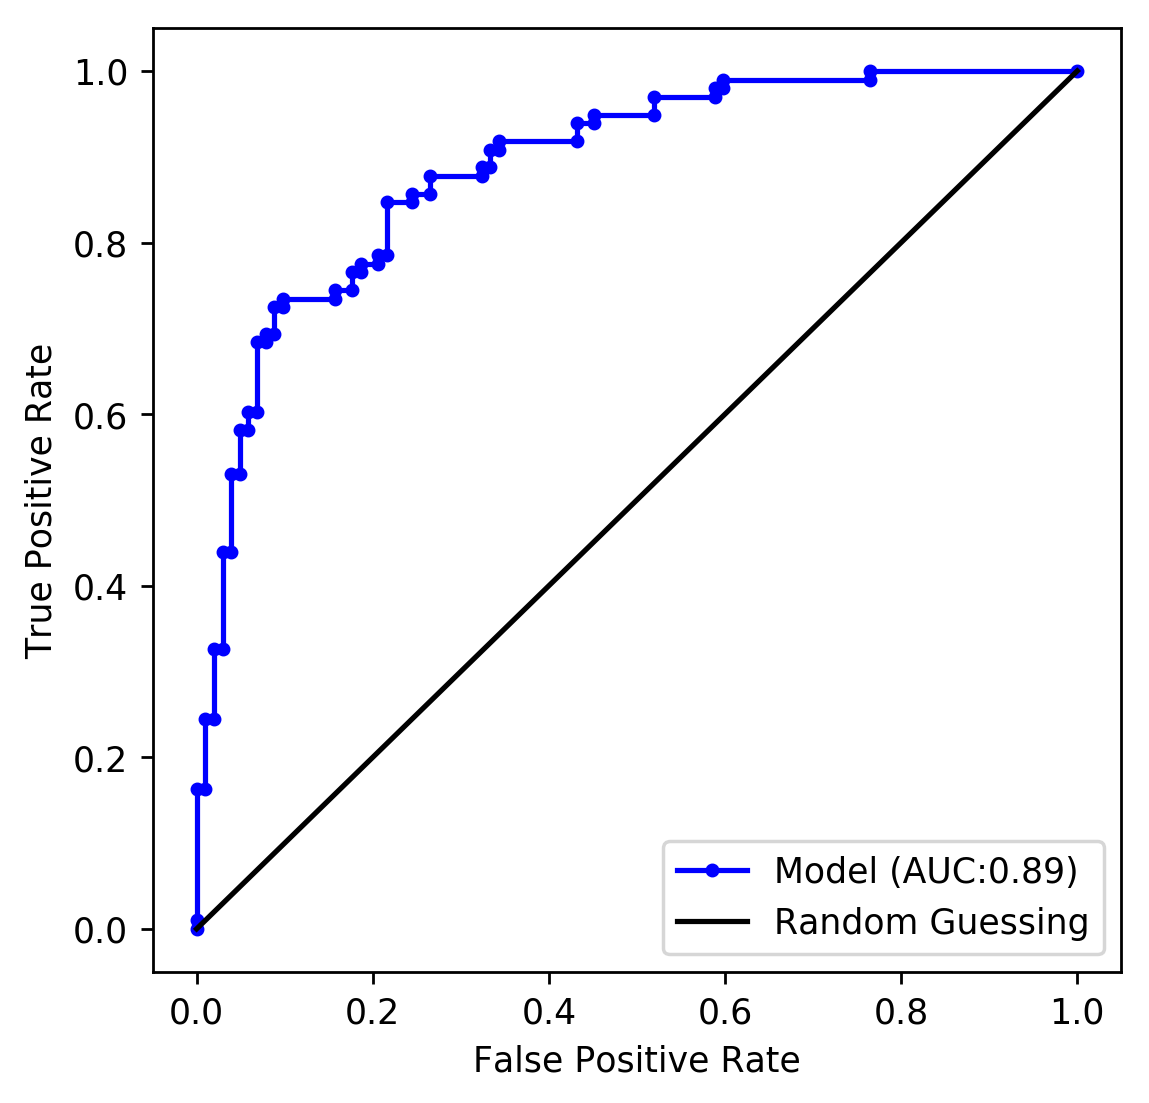

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(test_Y, pred_Y)
fig, ax1 = plt.subplots(1,1, figsize = (5, 5), dpi = 250)
ax1.plot(fpr, tpr, 'b.-', label = 'Model (AUC:%2.2f)' % roc_auc_score(test_Y, pred_Y))
ax1.plot(fpr, fpr, 'k-', label = 'Random Guessing')
ax1.legend(loc = 4)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');
fig.savefig('roc.pdf')

In [29]:
import keras
from keras.callbacks import TensorBoard
# keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0,  
#           write_graph=True, write_images=True)
# tbCallBack = keras.callbacks.TensorBoard(log_dir='Graph', histogram_freq=0,  
#           write_graph=True, write_images=True)
# tbCallback.set_model(tb_model)

NameError: name 'tbCallback' is not defined